In [1]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# DNN (Deep Neural Networks)

## Gradient Descent

Before jumping right into neural networks let's look at a simple idea of how we can perform gradient descent.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['class'] = iris.target_names[iris.target]

11501568/11490434 [==============================] - 0s 0us/step


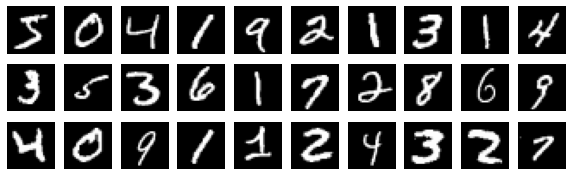

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Normalize
X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(10, 3))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
X_train_flat = X_train.reshape((X_train.shape[0], 28*28))
X_test_flat = X_test.reshape((X_test.shape[0], 28*28))

y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

In [6]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [8]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7671 - accuracy: 0.7869 - val_loss: 0.3562 - val_accuracy: 0.9009
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3425 - accuracy: 0.9025 - val_loss: 0.2968 - val_accuracy: 0.9143
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2892 - accuracy: 0.9167 - val_loss: 0.2546 - val_accuracy: 0.9284
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9272 - val_loss: 0.2347 - val_accuracy: 0.9323
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2307 - accuracy: 0.9350 - val_loss: 0.2142 - val_accuracy: 0.9402
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2095 - accuracy: 0.9401 - val_loss: 0.2017 - val_accuracy: 0.9433
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1919 - accuracy: 0.9451 - val_loss: 0.1886 - val_accuracy:

Let's explore some predictions.

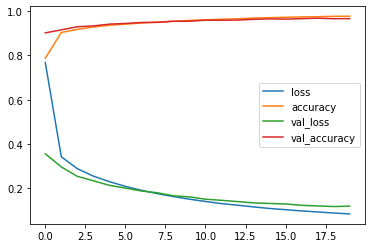

In [9]:
pd.DataFrame(loss.history).plot()

Structurally this is the same network we had before, thus our error rate is expected to be simmilar.

In [10]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.89%


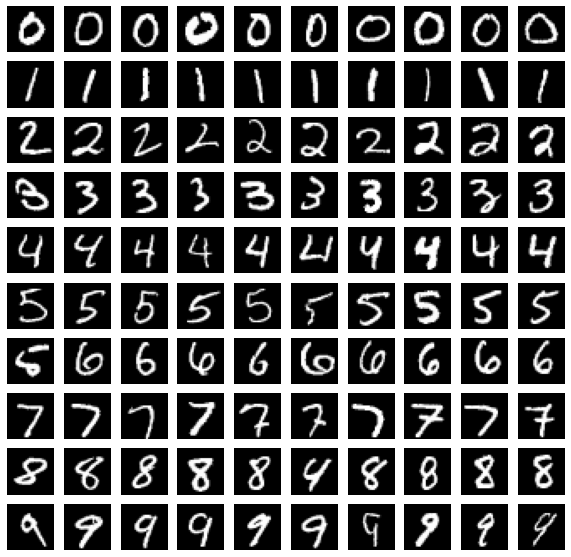

In [11]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        plt.imshow(X_test[pred == label][i], cmap='gray')
        plt.axis('off')
plt.show()
